# <div align="center">Battle of the Neighborhoods: Accessible Moscow<div align="center">

## <div align="center">Clustering Moscow Hotels Accessible to Visitors with Disabilities and Impairments<div align="center">

### Table of Contents

1. [Introduction](#Introduction)
2. [Problem](#Problem)
3. [Data Description](#Data) 
4. [Methodology](#Methodology)  
5. [Results and Discussion](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)

## 1. Introduction  <a id="Introduction"></a>

The capital of Russia, Moscow is an extremely important financial, travelling and medical hub for the Russians as well as for the visitors from all over the world. The largest city in Russia boasts numerous sights to explore and offers quite a number of services to use.

As such, it is highly important for Moscow to be as accessible and inclusive as possible. A lot of tourists coming here are seniors, or have health problems. Besides, a lot of patients have to arrive in the city to undergo treatment, which is not possible in their home towns, and often have to spend a considerable amount of time in the capital. 

The visitors tend to stay in hotels, and it is vital for them to have access to the facilities near their hotel of choice.

## 2. Problem <a id="Problem"></a>

The aim of this project is to help the target group, i.e. visitors with disabilities and impairments, choose their destination hotel suited to their needs, taking into the account the facilities nearby. 

## 3. Data Description <a id="Data"></a>

Regarding the problem, the following factors will influence our decision:

1. if the hotel provides amenities for people with disabilities and/or impairments;
2. distance of the venues from the given hotels.

To solve the problems, we require:
1. geolocational data for Moscow to find out the locations of the hotels. 
2. data on different venues in the vicinity of the specific hotel.

### 3.1. Geolocational Data for Moscow Hotels

We shall leverage the data available on the **Open Data portal** of the Government of Moscow. [The dataset](https://data.mos.ru/opendata/7703465612-obekty-turisticheskogo-pokaza-i-obekty-gostinichnogo-hozyaystva-goroda-moskvy-prisposoblennye-dlya-lits-s-ogranichennymi-vozmojnostyami-zdorovya-i-lyudey-pojilogo-vozrasta) has the information about hotels which have amenities for the elderly and the impaired. The information about the dataset is also available [in English](https://data.mos.ru/opendata/7703465612-objects-of-the-tourist-display-and-objects-of-the-hotel-industry-in-moscow-adapted-for-persons-with-the-removal-of-health-and-the-elderly).
The original dataset contains detailed information; however, we are particularly interested in the following rows:
* *geometry.coordinates*: Coordinates for each hotel.	
* *properties.Attributes.FullName*: Name of the hotel.	
* *properties.Attributes.Address*: Address of the hotel.	
* *properties.Attributes.FullAvailable*: Shows if the hotel is fully accessible for people with impairments, disabilities or the elderly.	
* *properties.Attributes.Available_o*: Shows if the hotel is accessible for people with Muscular Skeletal Disorders.
* *properties.Attributes.Available_z*: Shows if the hotel is accessible for the visually impaired .	
* *properties.Attributes.Available_s*: Shows if the hotel is accessible for people with hearing impairments.	
* *properties.Attributes.Available_k*: Shows if the hotel is accessible for wheelchair users.
* *properties.Attributes.PresenceRoom*: Shows if there are rooms designed for people with disabilities.

### 3.2. Data on Venues 

For this purpose, we will use **Foursquare** to gain the information. 

**Foursquare** is a location platform which provides data about venues within an area of interest, including their names, menus, photos and tips from other users. The Foursquare location platform will be used as the sole data source regarding the venues, since all the required information can be obtained through the API.

After creating the list of hotels, we will connect to the Foursquare API to gather information about venues neighbouring the hotels. For each hotel, we have chosen the radius to be **500 meters**, which will solve the distance issue.

### 3.3. Objectives

Thus, the approach taken here is to do the following:
1. explore each of the hotels individually;
2. plot the map to show the hotels under consideration;
3. use Foursquare to display venues nearby the hotels;
4. build the model by clustering the areas with similar features;
5. plot the new map with the clustered areas. 

## 4. Methodology <a id="Methodology"></a>

We will create our model with the help of Python. To do this, we must first process the dataset. The first step here is to install and import the required dependencies for this purpose.

In [1]:
#!pip install geojson 
import geojson #necessary for importing the dataset in .geojson format"

In [2]:
import pandas as pd #library for data analysis
import requests #library for making HTTP requests

### 4.1. Collecting Data on Hotels

To collect the data on Moscow hotels adjusted to the needs of people with disabilities and impairments, we send an API request to the Open Data portal. The file fetched will have the coordinates we need.

*Note: We could have used GeoPy for fetching the coordinates for the desired locations. However, free geocoders which GeoPy uses do not seem to work well with Russian addresses which have block or building numbers after house numbers. So, if one were to use this approach, they would have to manually strip the addresses of the block or building numbers, which seems to be working.*

In [3]:
url_mos = "https://apidata.mos.ru/v1/datasets/61221/features?api_key=3cf38fabb69d4f10698069844e132fc0"
get_url_mos = requests.get(url_mos)
open('mosdata.geojson', 'wb').write(get_url_mos.content)

144783

In [4]:
with open('mosdata.geojson', encoding="utf8") as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [5]:
data = pd.json_normalize(gj['features'])
data.head(3)

,type,geometry.type,geometry.coordinates,properties.DatasetId,properties.VersionNumber,properties.ReleaseNumber,properties.RowId,properties.Attributes.FullName,properties.Attributes.AdmArea,properties.Attributes.District,properties.Attributes.Address,properties.Attributes.FullAvailable,properties.Attributes.Available_o,properties.Attributes.Available_z,properties.Attributes.Available_s,properties.Attributes.Available_k,properties.Attributes.PresenceParking,properties.Attributes.PresenceWC,properties.Attributes.PresenceRoom,properties.Attributes.global_id
0,Feature,Point,"[37.645491, 55.682813]",61221,1,16,None,Гостиница «Иван Чай»,Южный административный округ,район Нагатино-Садовники,"город Москва, Нагатинская набережная, дом 10, ...",нет,да,да,нет,нет,да,нет,нет,896019231
1,Feature,Point,"[37.585951, 55.852088]",61221,1,16,None,Гостиница «Владыкино»,Северо-Восточный административный округ,район Отрадное,"город Москва, Алтуфьевское шоссе, дом 6",нет,нет,нет,нет,да,да,нет,нет,896019404
2,Feature,Point,"[37.736122, 55.70506]",61221,1,16,None,Гостиница «Москвич»,Юго-Восточный административный округ,район Текстильщики,"город Москва, 11-я улица Текстильщиков, дом 1",нет,нет,нет,нет,да,да,нет,нет,896019799


### 4.2. Preprocessing Data

Let's drop the columns we don't need and rename the remaining ones:

In [6]:
mos_data = data.drop(data.iloc[:, [0, 1, 3, 4, 5, 6, 8, 9, 10, 19]], axis=1)

In [7]:
mos_data = mos_data.replace(['да', 'нет'],[1, 0])

In [8]:
old_names = mos_data.columns.tolist()                                                                                                                                                                   

new_names = ['Coordinates','Hotel_Name', 'Access_Full', 'Access_MSD', 
             'Access_Vis_Im', 'Access_Hear_Im', 'Access_Wheelchair', 'Parking', 'WC_Special', 'Access_Room_Dis']                                                                                                                                                                             

mos_data = mos_data.rename(columns=dict(zip(old_names, new_names)))   

In [9]:
mos_data.head()

,Coordinates,Hotel_Name,Access_Full,Access_MSD,Access_Vis_Im,Access_Hear_Im,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis
0,"[37.645491, 55.682813]",Гостиница «Иван Чай»,0,1,1,0,0,1,0,0
1,"[37.585951, 55.852088]",Гостиница «Владыкино»,0,0,0,0,1,1,0,0
2,"[37.736122, 55.70506]",Гостиница «Москвич»,0,0,0,0,1,1,0,0
3,"[37.561412, 55.804493]",Гостиница «Брайтон»,0,1,0,0,0,1,0,0
4,"[37.587979, 55.876043]",Гостиница «Полярис»,0,0,0,0,0,1,0,0


The dataset contains some hotels that are not suited for people with disabilities and impairments; such hotels have parking available as the only amenity. So, we need to make sure a hotel is adapted to the needs of our target group by making sure it has at least one 'yes' in Columns 5-8 and 11 (i.e., adapted to people with a specific impairment and the availability of a specifically designed room). We will drop the rows that do not meet these requirements.

In [10]:
indexNames = mos_data[(mos_data['Access_MSD'] == 0) 
                     & (mos_data['Access_Vis_Im'] == 0) 
                     & (mos_data['Access_Hear_Im'] == 0) 
                     & (mos_data['Access_Wheelchair'] == 0) 
                     & (mos_data['Access_Room_Dis'] == 0)].index

In [11]:
mos_data.drop(indexNames, inplace=True)
mos_data.reset_index(drop=True, inplace=True)
mos_data.head()

,Coordinates,Hotel_Name,Access_Full,Access_MSD,Access_Vis_Im,Access_Hear_Im,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis
0,"[37.645491, 55.682813]",Гостиница «Иван Чай»,0,1,1,0,0,1,0,0
1,"[37.585951, 55.852088]",Гостиница «Владыкино»,0,0,0,0,1,1,0,0
2,"[37.736122, 55.70506]",Гостиница «Москвич»,0,0,0,0,1,1,0,0
3,"[37.561412, 55.804493]",Гостиница «Брайтон»,0,1,0,0,0,1,0,0
4,"[37.791304, 55.71576]",Гостиница «МосУзцентр»,0,1,0,0,1,1,1,0


Let's have a look at the new shape of our dataframe:

In [12]:
mos_data.shape
print("The shape of the dataset is {} rows and {} columns.".format(mos_data.shape[0], mos_data.shape[1]))

The shape of the dataset is 43 rows and 10 columns.


We can visualize the data on a bar chart to see how many hotels have amenities belonging to the selected categories. 

In [13]:
total_sum = mos_data.sum(axis=0)
total_sum = total_sum.drop(['Hotel_Name', 'Coordinates']).astype(int)
total_sum = total_sum.sort_values(ascending=False)

In [14]:
total_sum

Parking              41
Access_MSD           30
Access_Hear_Im       14
Access_Wheelchair    14
WC_Special           14
Access_Room_Dis      10
Access_Vis_Im         7
Access_Full           3
dtype: int32

<AxesSubplot:xlabel='Amenities in Hotels', ylabel='Number of Hotels'>

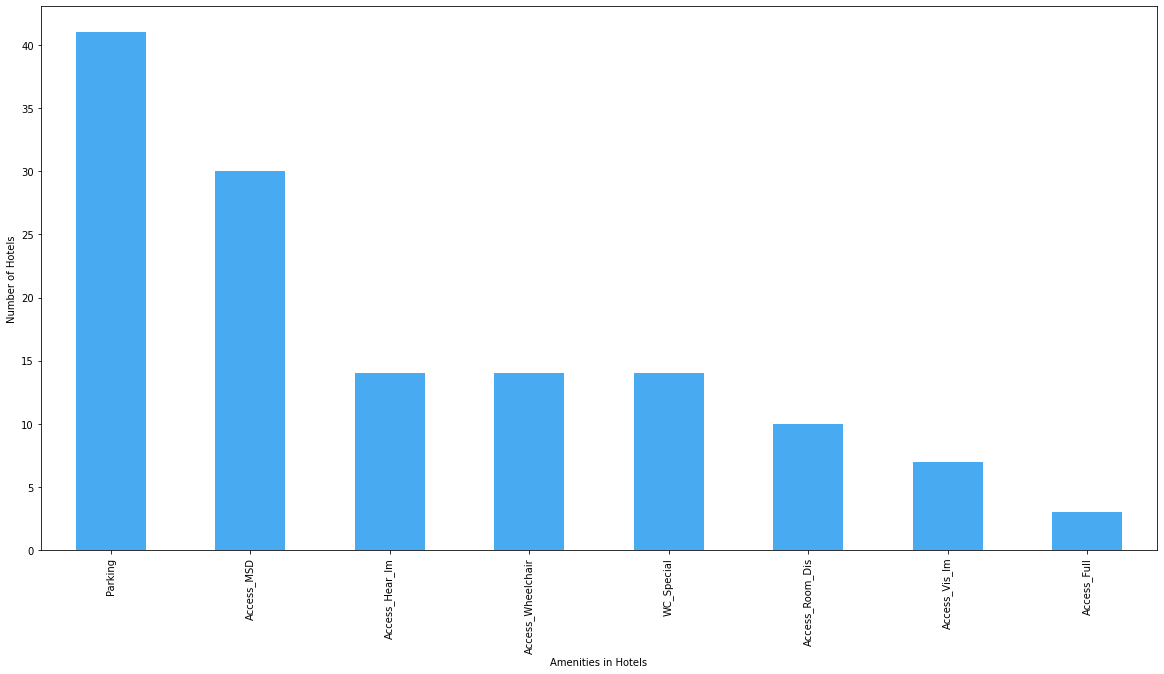

In [15]:
total_sum.plot(kind="bar", figsize=(20,10), xlabel='Amenities in Hotels', ylabel='Number of Hotels', color='#48aaf0')

As we can see, most of the hotels have parking facilities available for people with disabilities, which is quite useful if the person in question uses their car to get around a city. Approximately 71% of the hotels are made accessible for visitors with muscular skeletal disorders, followed by those suited for the hearing impaired and wheelchair users. The smallest number of hotels are fully accessible and can accomodate visitors with various health conditions.

We want to make the data accessible to an international audience, so we'll translate names of the hotels and the districts they are located in. This way, we will be able to see all the names on the map in English.

In [16]:
#!pip install googletrans  
from googletrans import Translator #library that implements Google Translate API
translator = Translator()

We will work with the column separately, so we will extract it from the dataframe, call the translate function and join it back.

In [17]:
hotel_tr = mos_data.iloc[:,1]
hotel_tr = hotel_tr.map(lambda x: translator.translate(x, src="ru", dest="en").text)
hotel_tr

0                                    Hotel "Ivan Tea"
1                                   Hotel "Vladykino"
2                                    Hotel "Moskvich"
3                                    Hotel "Brighton"
4                                Hotel "Mosus Center"
5                                      Hotel "Mitino"
6                                      Hotel "Astrus"
7                                Hotel "Mr. Zhulebin"
8                                          Hotel CSKA
9                          Hotel "Art Grand Victoria"
10                                    Hotel "Voyager"
11                                    Hotel "Moshack"
12                             Boutique Hotel "World"
13                         Hotel "BRICK DESIGN HOTEL"
14                    Hotel "On Pokrovsky-Streshnevo"
15                                      Hotel "Youth"
16                          Business - Hotel "Proton"
17                                     Hotel "Falcon"
18                          

This looks good, but let's tweak some of the names manually.

In [18]:
hotel_tr = hotel_tr.replace(['Tea', 'Mosus Center', 'Lublin', 'Moshack', 
                             'World', 'Youth', 'Falcon', 'Red Gate', 'Staraya Moscow',  
                             'Hotel "Hostel" Come on "on Pavelets"', 'Clover', 'Moon', 
                             'Ladomir Hotel on Jauze'],
                           ['Chai', 'MosUztsentr', 'Lyublino', 'Maroseyka', 'Mira', 
                            'Molodezhnaya', 'Sokol','Krasnye Vorota', 'Staraya Moskva', 
                            'Hostel "Zahodi" on Paveletskaya', 'Klever','Luna', 
                            'Ladomir Otel na Yauze'], regex=True)
hotel_tr

0                                   Hotel "Ivan Chai"
1                                   Hotel "Vladykino"
2                                    Hotel "Moskvich"
3                                    Hotel "Brighton"
4                                 Hotel "MosUztsentr"
5                                      Hotel "Mitino"
6                                      Hotel "Astrus"
7                                Hotel "Mr. Zhulebin"
8                                          Hotel CSKA
9                          Hotel "Art Grand Victoria"
10                                    Hotel "Voyager"
11                                  Hotel "Maroseyka"
12                              Boutique Hotel "Mira"
13                         Hotel "BRICK DESIGN HOTEL"
14                    Hotel "On Pokrovsky-Streshnevo"
15                               Hotel "Molodezhnaya"
16                          Business - Hotel "Proton"
17                                      Hotel "Sokol"
18                          

In [19]:
mos_data = mos_data.assign(Hotel_Name=hotel_tr)
mos_data.head()

,Coordinates,Hotel_Name,Access_Full,Access_MSD,Access_Vis_Im,Access_Hear_Im,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis
0,"[37.645491, 55.682813]","Hotel ""Ivan Chai""",0,1,1,0,0,1,0,0
1,"[37.585951, 55.852088]","Hotel ""Vladykino""",0,0,0,0,1,1,0,0
2,"[37.736122, 55.70506]","Hotel ""Moskvich""",0,0,0,0,1,1,0,0
3,"[37.561412, 55.804493]","Hotel ""Brighton""",0,1,0,0,0,1,0,0
4,"[37.791304, 55.71576]","Hotel ""MosUztsentr""",0,1,0,0,1,1,1,0


Let's take a closer look at the coordinates. We will need to extract latitudes and longitudes. In this dataset, they are reversed, so we will have to assign the correct index for the map of Moscow to appear.

In [20]:
hotel_latlng = mos_data['Coordinates'].astype('str')

hotel_lat = hotel_latlng.apply(lambda x: x.split(',')[1])
hotel_lat = hotel_lat.apply(lambda x: x.rstrip(']'))

hotel_lng = hotel_latlng.apply(lambda x: x.split(',')[0])
hotel_lng = hotel_lng.apply(lambda x: x.lstrip('['))

In [21]:
hotel_lat  = pd.DataFrame(hotel_lat.astype(float))
hotel_lat.columns=['Latitude']
hotel_lng = pd.DataFrame(hotel_lng.astype(float))
hotel_lng.columns=['Longitude']

In [22]:
mos_combined_data = pd.concat([mos_data.drop('Coordinates', axis=1), hotel_lat, hotel_lng], axis=1)
mos_combined_data.head()

,Hotel_Name,Access_Full,Access_MSD,Access_Vis_Im,Access_Hear_Im,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis,Latitude,Longitude
0,"Hotel ""Ivan Chai""",0,1,1,0,0,1,0,0,55.682813,37.645491
1,"Hotel ""Vladykino""",0,0,0,0,1,1,0,0,55.852088,37.585951
2,"Hotel ""Moskvich""",0,0,0,0,1,1,0,0,55.705060,37.736122
3,"Hotel ""Brighton""",0,1,0,0,0,1,0,0,55.804493,37.561412
4,"Hotel ""MosUztsentr""",0,1,0,0,1,1,1,0,55.715760,37.791304


Let's have a look at the data shape to make sure we haven't lost anything.

In [23]:
mos_combined_data.shape

(43, 11)

The data looks good. Now we will move on to the next step, which is visualizing the hotels on the map.

### 4.3. Visualizing Hotels

The first thing we need to do here is to install and import the modules needed.

In [24]:
#!pip install geopy
from geopy.geocoders import Nominatim #client for geolocating services

#!pip install folium
import folium #library for generating maps

We need to center the map on Moscow, so let's fetch the city coordinates via GeoPy. We will then use them to display the hotels on the map of Moscow.

In [25]:
address = "Moscow, Russia"

geolocator = Nominatim(user_agent="moscow_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The coordinates of Moscow are: {}, {}.".format(latitude, longitude))

The coordinates of Moscow are: 55.7504461, 37.6174943.


In [26]:
map_mos = folium.Map(location=[latitude, longitude], zoom_start=10)

# adding markers to map
for latitude, longitude, hotel in zip(mos_combined_data['Latitude'], mos_combined_data['Longitude'], mos_combined_data['Hotel_Name']):
    label = '{}'.format(hotel)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_opacity=0.8
        ).add_to(map_mos)  
    
map_mos

### 4.4. Getting the Venues

In order to display the venues and their categories, we need to initialize the Foursquare API credentials.

In [27]:
CLIENT_ID = 'JIUGE3RHXKOY2AY1LM5CKGKNE2OSFIPWX0NAI2TKQZTYQJH2' 
CLIENT_SECRET = 'OCKZXOPOYCN2Y40ESWYY3C1CWQQ5AMQSMSYOIT1J00AU1PXM' 
ACCESS_TOKEN = 'DHVLK51X4HNRQ3EJLTXOSJ2NVDB3JA3TTSXCFN1ZY4P3FQY2'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JIUGE3RHXKOY2AY1LM5CKGKNE2OSFIPWX0NAI2TKQZTYQJH2
CLIENT_SECRET:OCKZXOPOYCN2Y40ESWYY3C1CWQQ5AMQSMSYOIT1J00AU1PXM


Defining a function which will get the venues in the desired radius will allow us to display them and their categories for further analysis.

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Our next step is to run the defined function and store the information on venues in a new dataframe.

In [29]:
mos_venues = getNearbyVenues(names=mos_combined_data['Hotel_Name'],
                                   latitudes=mos_combined_data['Latitude'],
                                   longitudes=mos_combined_data['Longitude']
                                  )

Hotel "Ivan Chai"
Hotel "Vladykino"
Hotel "Moskvich"
Hotel "Brighton"
Hotel "MosUztsentr"
Hotel "Mitino"
Hotel "Astrus"
Hotel "Mr. Zhulebin"
Hotel CSKA
Hotel "Art Grand Victoria"
Hotel "Voyager"
Hotel "Maroseyka"
Boutique Hotel "Mira"
Hotel "BRICK DESIGN HOTEL"
Hotel "On Pokrovsky-Streshnevo"
Hotel "Molodezhnaya"
Business - Hotel "Proton"
Hotel "Sokol"
Hotel "Sofia" LLC "Rodeo"
Hotel "Clementin"
Hotel "Duet in Lyublino"
Hotel "Starosadsky"
Hotel "Comfort Class"
Avita Krasnye Vorota Hotel
Hostel "Avita"
"Art Hotel"
Hotel "Sadovnicheskaya"
Hotel "Time Inn on Schelkovskaya"
Hotel "Staraya Moskva"
"Grand Hotel Belorusskaya"
Hotel "Hilton Garden Inn Moscow Krasnoselskaya"
MOSCOW HOLIDAY HOTEL Hotel
Hotel "Grand Hotel Palacio"
Moss Boutique Hotel (Moss Boutique Hotel)
"Citadel Comfort Hotel"
Hostel "Zahodi" on Paveletskaya
Hostel "Klever"
Hotel "House"
Hotel MGPU
Hotel "Luna"
Mini-hotel Ladomir Otel na Yauze
Boutique Hotel "De Marie"
Boutique Hotel "Eliton"


Taking a look at the resulting dataframe's shape:

In [30]:
print(mos_venues.shape)
mos_venues.head()

(896, 7)


,Hotel,Hotel Latitude,Hotel Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Hotel ""Ivan Chai""",55.682813,37.645491,Красное & Белое,55.678923,37.645132,Convenience Store
1,"Hotel ""Ivan Chai""",55.682813,37.645491,"Детский клуб ""Дирижабль""",55.679395,37.642836,Arcade
2,"Hotel ""Ivan Chai""",55.682813,37.645491,Бородачи,55.678991,37.643691,Hookah Bar
3,"Hotel ""Ivan Chai""",55.682813,37.645491,Мясновъ,55.679520,37.641816,Butcher
4,"Hotel ""Ivan Chai""",55.682813,37.645491,Иверия,55.683131,37.640460,Caucasian Restaurant


In [31]:
mos_venues.groupby('Hotel').count()

,Hotel Latitude,Hotel Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Hotel,,,,,,
"""Art Hotel""",30,30,30,30,30,30
"""Citadel Comfort Hotel""",30,30,30,30,30,30
"""Grand Hotel Belorusskaya""",30,30,30,30,30,30
Avita Krasnye Vorota Hotel,30,30,30,30,30,30
"Boutique Hotel ""De Marie""",13,13,13,13,13,13
"Boutique Hotel ""Eliton""",30,30,30,30,30,30
"Boutique Hotel ""Mira""",30,30,30,30,30,30
"Business - Hotel ""Proton""",5,5,5,5,5,5
"Hostel ""Avita""",8,8,8,8,8,8


Let's check how many unique categories there are.

In [32]:
print('There are {} unique categories.'.format(len(mos_venues['Venue Category'].unique())))

There are 212 unique categories.


### 4.5. Grouping the Venues

The next step is to perform one hot encoding on the venue categories, merge the dataframes and group the rows by the mean of the frequency of occurence of each category.

In [33]:
import numpy as np

In [34]:
mos_onehot = pd.get_dummies(mos_venues[['Venue Category']], prefix="", prefix_sep="")
mos_onehot

,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# add hotel column back to dataframe
mos_onehot['Hotel'] = mos_venues['Hotel'] 

# move hotel column to the first column
fixed_columns = [mos_onehot.columns[-1]] + list(mos_onehot.columns[:-1])
mos_onehot = mos_onehot[fixed_columns]

mos_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Tunnel,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
mos_onehot.shape

(896, 212)

In [37]:
mos_grouped = mos_onehot.groupby('Hotel').mean().reset_index()

Let's define a function to sort the venues in descending order to determine which are the most common ones. As the number of venues is too big, we will have a look at 10 most common ones.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Hotel']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hotels_venues_sorted = pd.DataFrame(columns=columns)
hotels_venues_sorted['Hotel'] = mos_grouped['Hotel']

for ind in np.arange(mos_grouped.shape[0]):
    hotels_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mos_grouped.iloc[ind, :], num_top_venues)

hotels_venues_sorted.head()

,Hotel,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"""Art Hotel""",Restaurant,Tennis Court,Gym / Fitness Center,Sporting Goods Shop,Spa,Bus Stop,Gym,Soccer Stadium,Café,Gourmet Shop
1,"""Citadel Comfort Hotel""",Yoga Studio,Bar,Clothing Store,Café,Bookstore,Plaza,Vegetarian / Vegan Restaurant,Theater,Russian Restaurant,Flower Shop
2,"""Grand Hotel Belorusskaya""",Coffee Shop,Steakhouse,Seafood Restaurant,Cocktail Bar,Tea Room,Health Food Store,Other Repair Shop,Clothing Store,Gym / Fitness Center,Bar
3,Avita Krasnye Vorota Hotel,Coffee Shop,Dance Studio,Caucasian Restaurant,Accessories Store,Yoga Studio,Plaza,Modern European Restaurant,Belgian Restaurant,Mobile Phone Shop,Cosmetics Shop
4,"Boutique Hotel ""De Marie""",Middle Eastern Restaurant,Gym / Fitness Center,Steakhouse,Gourmet Shop,Café,Athletics & Sports,Pet Store,Supermarket,Donut Shop,Italian Restaurant


### 4.6. K-Means Clustering

Now we are going to create a model to cluster the hotels. We will run k-means and cluster the neighborhoods into a specific number of clusters, which we will derive using the elbow method.

In [40]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

mms = MinMaxScaler()
mms.fit(mos_grouped_1[['Latitude', 'Longitude']])
mos_fit=mms.transform(mos_grouped_1[['Latitude', 'Longitude']])

ssd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(mos_fit)
    ssd.append(km.inertia_)

plt.plot(K, ssd, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

As we can see, the elbow point is at 4, so the number of clusters in our model will be equal to 4.

In [41]:
kclusters = 4

mos_grouped_clustering = mos_grouped.drop('Hotel', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mos_grouped_clustering)

kmeans.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0])

Creating a new dataframe which includes the clusters and top 10 venues for each neighborhood:

In [42]:
# add clustering labels
hotels_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [43]:
mos_merged = mos_combined_data

mos_merged = mos_merged.join(hotels_venues_sorted.set_index('Hotel'), on='Hotel_Name')

mos_merged.head()
print(mos_merged.shape)

(43, 22)


In [44]:
mos_merged.head()

,Hotel_Name,Access_Full,Access_MSD,Access_Vis_Im,Access_Hear_Im,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis,Latitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Hotel ""Ivan Chai""",0,1,1,0,0,1,0,0,55.682813,...,Burger Joint,Liquor Store,Butcher,Café,Supermarket,Shipping Store,Caucasian Restaurant,Park,Convenience Store,Hookah Bar
1,"Hotel ""Vladykino""",0,0,0,0,1,1,0,0,55.852088,...,Sandwich Place,Hookah Bar,Gastropub,Café,Outdoor Sculpture,Grocery Store,Gym,Blini House,Park,Multiplex
2,"Hotel ""Moskvich""",0,0,0,0,1,1,0,0,55.705060,...,Bus Stop,Gym / Fitness Center,Track,Health Food Store,Pool,Bakery,Playground,Skating Rink,Supermarket,Restaurant
3,"Hotel ""Brighton""",0,1,0,0,0,1,0,0,55.804493,...,Supermarket,Cafeteria,Playground,Pool Hall,Cosmetics Shop,Bus Stop,Café,Middle Eastern Restaurant,Park,Tourist Information Center
4,"Hotel ""MosUztsentr""",0,1,0,0,1,1,1,0,55.715760,...,Fast Food Restaurant,Mobile Phone Shop,Cafeteria,Coffee Shop,Supermarket,Shoe Store,Health Food Store,Sushi Restaurant,BBQ Joint,Blini House


To make sure there are no undefined values in the new dataframe, let's drop them and check the shape of the dataframe.

In [45]:
mos_merged = mos_merged.dropna(subset=['Cluster Labels'])
mos_merged.shape

(43, 22)

Finally, let's visualize the clusters on the map.

In [46]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [47]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mos_merged['Latitude'], mos_merged['Longitude'], mos_merged['Hotel_Name'], mos_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's verify the clusters.

In [48]:
mos_merged.loc[mos_merged['Cluster Labels'] == 0, mos_merged.columns[[1] + list(range(5, mos_merged.shape[1]))]]

,Access_Full,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,0,1,0,0,55.682813,37.645491,0,Burger Joint,Liquor Store,Butcher,Café,Supermarket,Shipping Store,Caucasian Restaurant,Park,Convenience Store,Hookah Bar
1,0,1,1,0,0,55.852088,37.585951,0,Sandwich Place,Hookah Bar,Gastropub,Café,Outdoor Sculpture,Grocery Store,Gym,Blini House,Park,Multiplex
2,0,1,1,0,0,55.705060,37.736122,0,Bus Stop,Gym / Fitness Center,Track,Health Food Store,Pool,Bakery,Playground,Skating Rink,Supermarket,Restaurant
3,0,0,1,0,0,55.804493,37.561412,0,Supermarket,Cafeteria,Playground,Pool Hall,Cosmetics Shop,Bus Stop,Café,Middle Eastern Restaurant,Park,Tourist Information Center
4,0,1,1,1,0,55.715760,37.791304,0,Fast Food Restaurant,Mobile Phone Shop,Cafeteria,Coffee Shop,Supermarket,Shoe Store,Health Food Store,Sushi Restaurant,BBQ Joint,Blini House
5,0,0,1,0,0,55.844242,37.383477,0,Electronics Store,Yoga Studio,Sushi Restaurant,Mobile Phone Shop,Gourmet Shop,Nail Salon,Pizza Place,Photography Lab,Pharmacy,Nightclub
6,1,1,1,1,1,55.657162,37.496850,0,Health Food Store,Eastern European Restaurant,Toy / Game Store,Gastropub,Café,Spa,Gym,Gym / Fitness Center,Gym Pool,Park
7,0,1,1,0,0,55.704453,37.841858,0,Toy / Game Store,Train Station,Soup Place,Italian Restaurant,Bus Stop,Supermarket,Cosmetics Shop,Flower Shop,Grocery Store,Massage Studio
8,0,0,1,1,0,55.792007,37.536818,0,Coffee Shop,Italian Restaurant,Board Shop,Steakhouse,Pizza Place,Tennis Stadium,Cosmetics Shop,Supplement Shop,Gym / Fitness Center,Multiplex
9,0,0,1,1,1,55.724613,37.633189,0,Coffee Shop,Auto Workshop,Eastern European Restaurant,Bakery,Soccer Field,Theater,Health & Beauty Service,Gym / Fitness Center,Escape Room,Fountain


In [49]:
mos_merged.loc[mos_merged['Cluster Labels'] == 1, mos_merged.columns[[1] + list(range(5, mos_merged.shape[1]))]]

,Access_Full,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,0,0,1,0,0,55.815726,37.772969,1,Auto Workshop,Bus Station,Gym / Fitness Center,Bed & Breakfast,Cafeteria,Shopping Mall,Yoga Studio,Pedestrian Plaza,Notary,Office
27,0,0,1,0,0,55.819203,37.787804,1,Car Wash,Candy Store,Supermarket,Auto Workshop,Noodle House,Notary,Office,Opera House,Other Repair Shop,Outdoor Sculpture


In [50]:
mos_merged.loc[mos_merged['Cluster Labels'] == 2, mos_merged.columns[[1] + list(range(5, mos_merged.shape[1]))]]

,Access_Full,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,0,0,1,0,0,55.78126,37.82334,2,Gym,Cosmetics Shop,Basketball Court,Yoga Studio,Pedestrian Plaza,Nightclub,Noodle House,Notary,Office,Opera House


In [51]:
mos_merged.loc[mos_merged['Cluster Labels'] == 3, mos_merged.columns[[1] + list(range(5, mos_merged.shape[1]))]]

,Access_Full,Access_Wheelchair,Parking,WC_Special,Access_Room_Dis,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,0,0,1,0,0,55.664251,37.771861,3,Bus Stop,Park,Food & Drink Shop,Playground,Supermarket,Convenience Store,Grocery Store,Gym / Fitness Center,Yoga Studio,Noodle House
20,0,0,1,0,0,55.669069,37.777401,3,Food & Drink Shop,Playground,Supermarket,Vietnamese Restaurant,Grocery Store,Gym / Fitness Center,Paper / Office Supplies Store,Nail Salon,Nightclub,Noodle House


## 5. Results and Discussion <a id="Results"></a>

Although the number of hotels suited for people with disabilities and impairments is small for a city as large as Moscow, there are various facilities in the vicinity, including places to eat in different price ranges, supermarkets, parks, transportation options and sports facilities, should one choose to take a look at rehabilitation courses they might provide.

The biggest cluster contains all the hotels in the center and the majority of the hotels in the more prestigious districts, with a wide variety of restaurants, cafes and shops available nearby. 

The next cluster is located near the northern transportation hub in Moscow, which allows for easy access to the Moscow Central Bus Terminal. There are also car facilities nearby, so it might be preferred by those travelling by car.

The following cluster consists of one hotel and is located in the vicinity of a large park in Moscow with lots of walking trails and a small Kremlin to explore (the Izmailovo Kremlin). It also has a lot of sports facilities, including a gym with a swimming pool. As the hotel is adapted to people with MSD, they might opt to choose rehabilitation programs in the sports facilities, provided they suit their needs and individual conditions.

The final cluster is located in a quiet neighborhood near a medium-sized park, with supermarkets and convenience stores nearby.

Although not shown in the top-10 venues, some of the hotels have hospitals nearby.

## 6. Conclusion <a id="Conclusion"></a>

The purpose of this project was to explore the hotels of Moscow, which contain facilities suited for visitors with disabilities and impairments, choose their destination hotel suited to their needs, considering the type of venues relatively close to the hotels.

We could see that despite the initial large number, few hotels are actually making the experience of visiting Moscow accessible to anyone. Although the authorities claim they are working on improving the city's facilities, and, indeed, more wheelchair ramps, elevators and improved trasportation have appeared over the past 5 years, there is a lot of room for improvement. In our case, the majority of the hotels with only parking listed as the available feature could be made more accessible by introducing more amenities for visitors with disabilities and impairments.

Regarding the hotels analysed, we can see that there are useful venues nearby, belonging to different categories, such as food, health, shops, etc. The hotels seem to be located near major roads and metro stations, which allows for easier transportation around the city.

All in all, there are a number of facilities to choose from based on the visitors' expectations. Hopefully, with the future development of the city, Moscow would be more accessible to everyone, and there will be plenty more hotels to choose from.

## 7. References <a id="References"></a>

1. [Dataset on Hotels: Russian Version](https://data.mos.ru/opendata/7703465612-obekty-turisticheskogo-pokaza-i-obekty-gostinichnogo-hozyaystva-goroda-moskvy-prisposoblennye-dlya-lits-s-ogranichennymi-vozmojnostyami-zdorovya-i-lyudey-pojilogo-vozrasta/data/table?versionNumber=1&releaseNumber=16)
2. [Dataset on Hotels: English Version (dataset passport)](https://data.mos.ru/opendata/7703465612-objects-of-the-tourist-display-and-objects-of-the-hotel-industry-in-moscow-adapted-for-persons-with-the-removal-of-health-and-the-elderly?pageNumber=1&countPerPage=10)
3. [Moscow Open Data Portal API](https://apidata.mos.ru/help/index#!/Features/Features_GetListByDatasetId_0)
4. [Foursquare](https://foursquare.com)